### Langchain

In [ ]:
!pip install openai
!pip install langchain

In [ ]:
#Setup key
import os
os.environ["OPENAI_API_KEY"] = "YOUR KEY"

In [ ]:
# openai 모듈을 체인으로 걸겠다~
from langchain.llms import OpenAI

# openai.ChatCompletion.create(model="gpt-3.5-turbo-0613")

llm = OpenAI(model_name="gpt-3.5-turbo-0613",
            temperature = 0.7)
text = "웃긴 얘기 해줘"
print(llm(text))

/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:200: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:785: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


큰 고래가 작은 고래에게 물어봅니다. "왜 너는 항상 행복해 보이니?" 작은 고래는 대답합니다. "저는 고래들 중에서 최고의 재미있는 고래니까요!"


## 2. Loader

### 2-1. PDF

In [ ]:
! pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.1/271.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("MachineLearning-Lecture01.pdf")
pages = loader.load()

In [ ]:
len(pages) # 총 page 수

22

In [ ]:
page = pages[0]
page # 첫 번째 페이지 글 불러오기

Document(page_content='MachineLearning-Lecture01  \nInstructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is ju st spend a little time going over the logistics \nof the class, and then we\'ll start to  talk a bit about machine learning.  \nBy way of introduction, my name\'s  Andrew Ng and I\'ll be instru ctor for this class. And so \nI personally work in machine learning, and I\' ve worked on it for about 15 years now, and \nI actually think that machine learning is th e most exciting field of all the computer \nsciences. So I\'m actually always excited about  teaching this class. Sometimes I actually \nthink that machine learning is not only the most exciting thin g in computer science, but \nthe most exciting thing in all of human e ndeavor, so maybe a little bias there.  \nI also want to introduce the TAs, who are all graduate students doing research in or \nrelated to the machine learni ng and all aspects of machin e l

In [ ]:
print(page.page_content[0:500]) # 500글자 불러오기

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


In [ ]:
page.metadata

{'source': 'MachineLearning-Lecture01.pdf', 'page': 0}

### 2-2. YouTube

In [ ]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [ ]:
! pip install yt_dlp
! pip install pydub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 35.1 MB/s eta 0:00:00


In [ ]:
url="https://youtu.be/--khbXchTeE" # gpt4 소개 영상
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://youtu.be/--khbXchTeE
[youtube] --khbXchTeE: Downloading webpage
[youtube] --khbXchTeE: Downloading ios player API JSON
[youtube] --khbXchTeE: Downloading android player API JSON
[youtube] --khbXchTeE: Downloading m3u8 information
[info] --khbXchTeE: Downloading 1 format(s): 140
[download] Destination: docs/youtube//Introducing GPT-4.m4a
[download] 100% of    2.97MiB in 00:00:00 at 8.03MiB/s   
[FixupM4a] Correcting container of "docs/youtube//Introducing GPT-4.m4a"
[ExtractAudio] Not converting audio docs/youtube//Introducing GPT-4.m4a; file is already in target format m4a
Transcribing part 1!


In [ ]:
docs[0].page_content

"GPT-4 takes what you prompt it with and just runs with it. From one perspective, it's a tool, a thing you can use to get useful tasks done in language. From another perspective, it's a system that can make dreams, thoughts, ideas flourish in text in front of you. GPT-4 is incredibly advanced and sophisticated. It can take in and generate up to 25,000 words of text, around eight times more than chat GPT. It understands images and can express logical ideas about them. For example, it can tell us that if the strings in this image were cut, the balloons would fly away. This is the place where you just get turbocharged by these AIs. They're not perfect, they make mistakes, and so you really need to make sure that you know the work is being done to your level of expectation. But I think that it is fundamentally about amplifying what every person is able to do. GPT-4 training finished last August, and everything that's been happening in the past few months, up until we've released it, has be

### 2-3. URLs

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/37signals-is-you.md")

In [ ]:
docs = loader.load()

In [ ]:
print(docs[0].page_content[:500])













































































handbook/37signals-is-you.md at master · basecamp/handbook · GitHub
















































Skip to content







Toggle navigation










            Sign up
          


 













        Product
        












Actions
        Automate any workflow
      







Packages
        Host and manage packages
      







Security
        Find and fix vulnerabilities
      







Code


## 3. Document Splitting
보통 `RecursiveCharacterTextSplitter` 를 권장

### 3-1. RecursiveCharacter &  CharacterText Splitter

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [ ]:
chunk_size =26
chunk_overlap = 4

In [ ]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [ ]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [ ]:
# 26글자씩 분할
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [ ]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [ ]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [ ]:
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"

In [ ]:
# 공백포함 26글자
r_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

In [ ]:
# 공백포함하지 않고, 26글자
c_splitter.split_text(text3)

['a b c d e f g h i j k l m n o p q r s t u v w x y z']

In [ ]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' ' # 공백 포함
)
c_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

### 3-2. Token splitting
원하는 경우 토큰 수를 명시적으로 분할할 수 있음.
토큰은 보통 4자 내외

In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.1 MB/s eta 0:00:00


In [ ]:
from langchain.text_splitter import TokenTextSplitter

In [ ]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [ ]:
text1 = "Hi! Nice to meet you."

In [ ]:
text_splitter.split_text(text1)

['Hi', '!', ' Nice', ' to', ' meet', ' you', '.']

In [ ]:
text_splitter = TokenTextSplitter(chunk_size=10, chunk_overlap=0)

In [ ]:
docs = text_splitter.split_documents(pages)

In [ ]:
docs[0]

Document(page_content='MachineLearning-Lecture01  \n', metadata={'source': 'MachineLearning-Lecture01.pdf', 'page': 0})

In [ ]:
pages[0].metadata

{'source': 'MachineLearning-Lecture01.pdf', 'page': 0}

그림 출처: https://learn.deeplearning.ai/

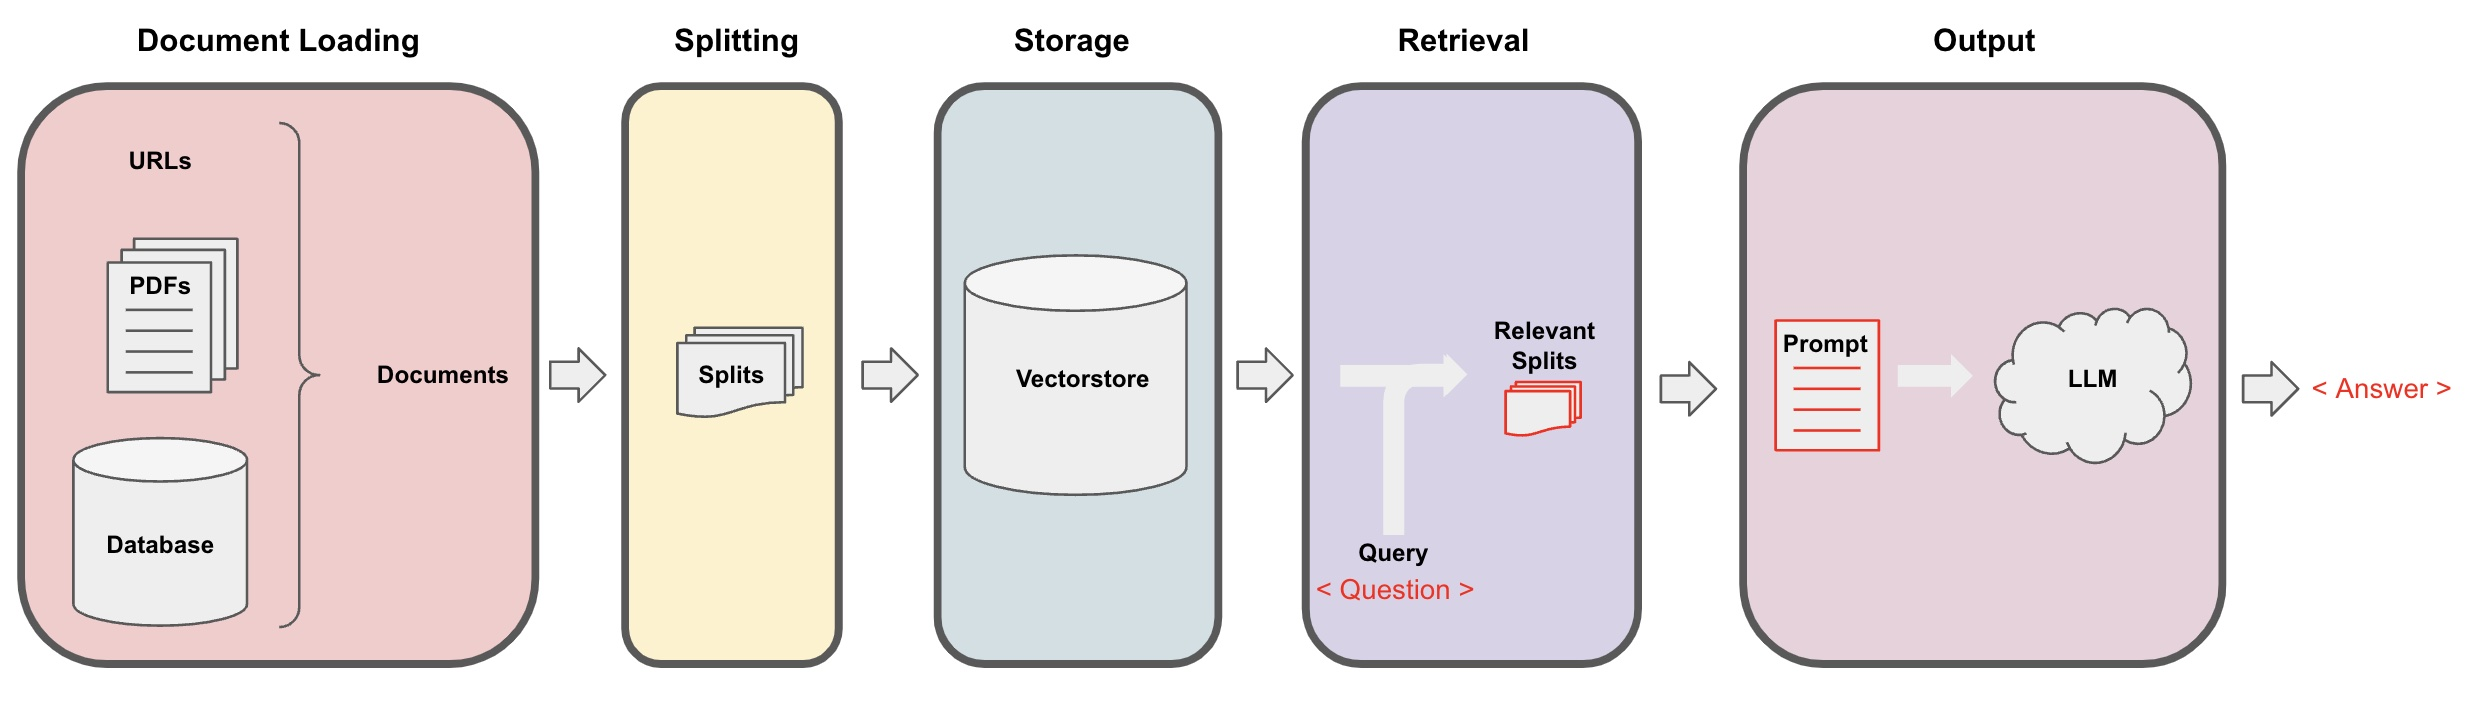

## 4. PDF 파일기반 질의응답
**Retrieval augmented generation (RAG)**\
LLM은 실행의 일부로 외부 데이터 세트에서 문맥 문서를 검색한다.\
이는 특정 문서(예: PDF, 동영상 세트 등)에 대해 질문하고자 할 때 유용하다

### 4-1. Setting and Split

In [ ]:
!pip install openai # openai 라이브러리를 설치합니다.
!pip install langchain # 랭체인 라이브러리를 설치합니다.

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "YOUR KEY" # 환경변수에 OPENAI_API_KEY를 설정합니다.

In [ ]:
from langchain.chat_models import ChatOpenAI

In [ ]:
!pip install pypdf
!pip install chromadb
!pip install tiktoken

In [ ]:
from langchain.document_loaders import PyPDFLoader # PDF 문서를 로드하기 위한 도구
from langchain.embeddings.openai import OpenAIEmbeddings # OpenAIEmbeddings는 OpenAI를 기반으로 한 텍스트 임베딩을 생성하는 클래스
from langchain.embeddings.cohere import CohereEmbeddings # CohereEmbeddings는 Cohere 기반의 텍스트 임베딩을 생성하는 클래스입니다.
from langchain.text_splitter import CharacterTextSplitter # 텍스트를 문자 단위로 분리하는 도구
from langchain.vectorstores.elastic_vector_search import ElasticVectorSearch # ElasticSearch 기반의 벡터 검색 도구
from langchain.vectorstores import Chroma # Chroma는 벡터 저장과 관련된 여러 기능을 제공하는 모듈

In [ ]:
# PDF를 벡터DB에 등록해서, 이를 기반으로 채팅해보기
loader = PyPDFLoader("호남연수원.pdf")
documents = loader.load()

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(documents)

In [ ]:
texts

[Document(page_content='호남연수원 \n중소기업의  인력양성을  위하여  고객이  원하는  장소에서  편리하게  교육을  받을 수 있는 네트워크를  구\n축하였습니다 . \n \n설립취지  \n• 연수시설이  없어 체계적인  직원교육을  실시하기  어려운  중소기업에  양질의  인재양성  기회를  제공합\n니다. \n• 중소기업의  기업가  정신함양  및 실무응용  능력향상을  목표로  합니다 . \n• 현장 실무중심의  연수강좌와  쾌적한  연수환경을  제공함으로써  인재양성에  기여하고자  합니다 . \n \n호남연수원의  특징 \n• 현장과  실무중심의  교육을  실시합니다 . \n• 현장 경험이  풍부한  강사진  확보로  현장 실무 위주의  연수를  진행합니다 . \n• 최신 교육 기자재를  보유하고  있으며  1인 1대 실습 위주 연수를  진행합니다 . \n• 특급 호텔급  숙박시설을  보유하고  있습니다 . \n• 지역 중소기업의  Needs 를 반영한  연수를  실시합니다 . \n• 광산업 , 조선업  등 지방 특화산업에  관련된  연수를  지원합니다 . \n \n중소벤처기업진흥공단  호남연수원이  나아온  길 그 성공의  길을 회원 여러분께  소개합니다 . \n2014. 05  고용노동부  훈련기관  평가 “A”등급 획득 \n2012. 01  중소벤처기업진흥공단  호남연수원으로  개칭 \n2011. 03  호남 청년창업사관학교  개소 \n2009. 11  CEO명품아카데미  개설 \n2007. 07  중소기업호남연수원으로  개칭 \n2001. 09  광주연수원  개원 \n2001. 07  광주연수원  준공 \n2000. 01  착공', metadata={'source': '호남연수원.pdf', 'page': 0}),
 Document(page_content="분야별  업무 담당자들을  소개해  드립니다 . \n창의인재 (경영)연수담당  062-250-3036/3023   \n스마트제조기술  담당 062-250-3037/063 

### 4-2. Embedding and Retriever

In [ ]:
embeddings = OpenAIEmbeddings() # openai의 임베딩 모델 가져오기
vector_store = Chroma.from_documents(texts, embeddings) # 수치화해서 집어넣자(주어진 텍스트에 대한 임베딩을 생성해서 벡터저장소에 저장) -> embeddings
retriever = vector_store.as_retriever(search_kwargs={"k": 2}) # Chroma 벡터 저장소를 기반으로 검색가능한 검색기(retriever)를 생성합니다. 'k': 2는 검색 결과로 상위 2개의 항목을 반환하도록 설정합니다.

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQAWithSourcesChain # 소스 정보와 함께 검색 기반의 질의응답(QA) 작업을 수행하는 체인(파이프라인)

llm = ChatOpenAI(model_name="gpt-3.5-turbo-0613", temperature=0)

chain = RetrievalQAWithSourcesChain.from_chain_type( #문서 source와 함께 검색 기능 질의응답 Chain
    llm=llm,
    retriever = retriever, # 검색기
    return_source_documents=True) # 결과 얻을 때 source까지

In [ ]:
query = "호남연수원 설립취지 알려줘"
result = chain(query)
result['answer']

'호남연수원의 설립취지는 다음과 같습니다:\n- 중소기업에게 체계적인 직원교육을 제공하기 어려운 경우에 양질의 인재양성 기회를 제공합니다.\n- 중소기업의 기업가 정신함양 및 실무응용 능력향상을 목표로 합니다.\n- 현장 실무중심의 연수강좌와 쾌적한 연수환경을 제공하여 인재양성에 기여합니다.\n\n'

In [ ]:
result['sources']

'호남연수원.pdf'

### 4-3. Prompting
프롬프트: 모델에 대한 입력을 의미. 이를 통해 모델을 프로그래밍할 수 있도록 여러 구성이 가능하도록 기능을 제공해줌.

In [ ]:
from langchain.prompts.chat import (
    ChatPromptTemplate, # ChatPromptTemplate는 채팅에 사용되는 기본 템플릿
    SystemMessagePromptTemplate, # SystemMessagePromptTemplate는 시스템 메시지를 위한 템플릿
    HumanMessagePromptTemplate, # HumanMessagePromptTemplate는 사용자(인간) 메시지를 위한 템플릿
)

system_template="""Use the following pieces of context to answer the users question shortly.
Your task is to answer based on the documents from the 호남연수원.
If you don't know the answer, just say that "I don't know", don't try to make up an answer.
----------------
{summaries}

You MUST answer in Korean:"""

messages = [
    SystemMessagePromptTemplate.from_template(system_template),
    HumanMessagePromptTemplate.from_template("{question}")
]

prompt = ChatPromptTemplate.from_messages(messages)

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQAWithSourcesChain

chain_type_kwargs = {"prompt": prompt}

llm = ChatOpenAI(model_name="gpt-3.5-turbo-0613", temperature=0)  # Modify model_name if you have access to GPT-4

chain = RetrievalQAWithSourcesChain.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever = retriever,
    return_source_documents=True,
    chain_type_kwargs=chain_type_kwargs
)

## 5. 챗봇 만들기(PDF 기반)
gradio: https://www.gradio.app/ \
- Gradio는 친숙한 웹 인터페이스로 머신 러닝 모델을 가장 빠르게 데모할 수 있는 방법으로, 누구나 어디서나 사용할 수 있습니다!
- 템플릿 제공

In [ ]:
!pip install gradio # 그라디오 라이브러리를 설치합니다.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 40.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 5.7 MB/s eta 0:00:00
   

In [ ]:
import gradio as gr

In [ ]:
# previous_message = []

In [ ]:
def respond(message, chat_history):  # 채팅봇의 응답을 처리하는 함수를 정의합니다.
    # global previous_message
    result = chain(message)

    bot_message = result['answer']

    # for i, doc in enumerate(result['source_documents']):
    #     bot_message += '[' + str(i+1) + '] ' + doc.metadata['source'] + '(' + str(doc.metadata['page']) + ') '
    # previous_message += messages
    chat_history.append((message, bot_message))  # 채팅 기록에 사용자의 메시지와 봇의 응답을 추가합니다.

    return "", chat_history  # 수정된 채팅 기록을 반환합니다.

with gr.Blocks() as demo:  # gr.Blocks()를 사용하여 인터페이스를 생성합니다.
    chatbot = gr.Chatbot(label="채팅창")  # '채팅창'이라는 레이블을 가진 채팅봇 컴포넌트를 생성합니다.
    msg = gr.Textbox(label="입력")  # '입력'이라는 레이블을 가진 텍스트박스를 생성합니다.
    clear = gr.Button("초기화")  # '초기화'라는 레이블을 가진 버튼을 생성합니다.

    msg.submit(respond, [msg, chatbot], [msg, chatbot])  # 텍스트박스에 메시지를 입력하고 제출하면 respond 함수가 호출되도록 합니다.
    clear.click(lambda: None, None, chatbot, queue=False)  # '초기화' 버튼을 클릭하면 채팅 기록을 초기화합니다.

demo.launch(debug=True)  # 인터페이스를 실행합니다. 실행하면 사용자는 '입력' 텍스트박스에 메시지를 작성하고 제출할 수 있으며, '초기화' 버튼을 통해 채팅 기록을 초기화 할 수 있습니다.

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


In [ ]:
# huggingface에 업로드에서 서빙할 수 있음.
# api 노출 주의